<a href="https://colab.research.google.com/github/MahithShetty/YelpFakeReviewDetection/blob/main/Final_Model_Fake_Review_Detection_on_Yelp_Restaurant_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


import json
from outscraper import ApiClient

api_cliet = ApiClient(api_key='Z29vZ2xlLW9hdXRoMnwxMDEyOTQ2MjUxMzg0MTA2NTg5Mzh8OTJlNjY5NGUzYg')

response = api_cliet.google_maps_reviews(
    'https://www.google.com.sa/maps/place/Golden+Royal+Restaurant+LLC/@21.5623684,39.206369,15z/data=!4m5!3m4!1s0x15c3d1679b2aeb3b:0x91cfbb17454ea0b4!8m2!3d21.5546421!4d39.2111619?hl=en&authuser=0',
   language='en', limit=1 , reviewsLimit=3
)

				
with open('maps_result6.json','w' ) as file:
    json.dump(response , file , indent=4)
++

# Importing Dataset

In [1]:
# coding: utf-8 

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mb
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import re
import collections
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

import numpy as np

import pymongo,pandas as pd
from bson import ObjectId

import matplotlib as mb
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import plotnine as p9

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from dateutil import parser
from pandas import Timestamp

#from ggplot import *
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import math


nltk.download('punkt')
nltk.download('stopwords')


# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np

#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('yelp_restaurants_500k.csv')  

c:\Users\w_ewe\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\w_ewe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w_ewe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

data = pd.read_csv('Google_dataset5.csv', header=0, sep=',', quotechar='"')

# Data Pre-processing

In [3]:
data['review_text'] = data.review_text.astype(str)
textData = pd.DataFrame(list(data['review_text']))
textData.head()

,0
0,النادي نظيف للغاية التعقيم بشكل مستمر اخصائية ...
1,نظافة اهتمام بالاحترازات ومراقبه الكمام ماعدا ...
2,من اجمل النوادي.. مشمس بالنهار والمدربات ممتاز...
3,النادي نظيف والمدربات كويسات وعندهم أخصائيات ع...
4,النادي جميل ومدربات رائعات لكن ٤ نجوم لصغر حجمه


In [4]:
data.count()

query                                  69
name                                   69
google_id                              69
place_id                               69
location_link                          69
reviews_link                           69
reviews_per_score                      69
rating                                 69
review_id                              69
author_link                            69
author_title                           69
author_id                              69
author_image                           69
review_text                            69
review_img_url                         69
owner_answer                            0
owner_answer_timestamp                  0
owner_answer_timestamp_datetime_utc     0
review_link                            69
review_rating                          69
review_timestamp                       69
review_datetime_utc                    69
review_likes                           69
reviews_id                        

Making a customized list of stop words

Cleaning Text
- Remove punctions
- Remove digits
- Split sentences on whitespace 
- Remove stopwords

In [5]:

#الإلغاء المكرر
data.duplicated().value_counts()

# filling a null values using fillna() 
data["review_text"].fillna("missing data", inplace = True) 

# Define a function to clean the text

text = data[['review_text']]
# Removes all special characters and numericals leaving the alphabets
def clean_text(text):  
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى",
              "\\",'\n', '\t','&quot;','?','؟','!','(تمت الترجمة بواسطة Google.)','تمت الترجمه بواسطه' , 'التعليق الاصلي']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا",
               "","","","ي","",' ', ' ',' ',' ? ',' ؟ ', ' ! ',' ',' ',' ']
    
    tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(tashkeel,"", text)
    
    longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(longation, subst, text)
    
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"[a-zA-Z]", '', text)
    text = re.sub(r"\d+", ' ', text)
    text = re.sub(r"\n+", ' ', text)
    text = re.sub(r"\t+", ' ', text)
    text = re.sub(r"\r+", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = text.replace('(تمت الترجمة بواسطة Google.)', ' ')
    text = text.replace('تمت الترجمه بواسطه', ' ')
    text = text.replace('التعليق الاصلي', ' ')
   
    text = re.sub("[a-zA-Z0-9_]",'',text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    text = text.strip()
    

    return text

# Cleaning the text in the review column
data['Cleaned_Reviews'] = data['review_text'].apply(clean_text)    


In [6]:
words = data['Cleaned_Reviews'].iteritems #عشان نعمل لوب صف صف
count =  data['Cleaned_Reviews'].count() #يحسب عدد الصفوف

for index, row in words():

    def tokenize_text(row): 
        row = row.split() # Split string into words
        row = [w for w in row if w not in stopwords.words("arabic")] # Remove stopwords
        row = [PorterStemmer().stem(w) for w in row] # stem
        return " ".join(row) # هذا لو ابغاه يرجعها ليا جملة و حدة
    
    if index == count - 1:
        break
    
# Tokenization the text in the Cleaned_Reviews column
data['Tokeniz_Reviews'] = data['Cleaned_Reviews'].apply(tokenize_text)    

In [7]:
# Replace on all selected columns
data['pTokeniz_Reviews'] = data[['Tokeniz_Reviews']].apply(lambda x: x.str.strip()).replace('', np.nan)

# filling a null values using fillna() 
data["pTokeniz_Reviews"].fillna("missing data", inplace = True) 

In [8]:
#size = 1000
#list_of_dfs = [data.loc[i:i+size-1,:] for i in range(0, len(data),size)]

In [9]:

words = data['pTokeniz_Reviews'].iteritems #عشان نعمل لوب صف صف
count =  data['pTokeniz_Reviews'].count() #يحسب عدد الصفوف


for index, row in words(): 
  if row == "  " :
    continue

  def translat_text(row):
      row= TextBlob(row).translate(from_lang='ar' , to='en')  
      return "".join(row) 

  if index == count - 1:
    break 

# Translated text in the Cleaned_Reviews column
data['Translated_Reviews'] = data['pTokeniz_Reviews'].apply(translat_text ) 

Adding custom features

In [10]:
# We will be using only 150 words for learning for each review
def trim_data_lem(text):
  text = word_tokenize(text)
  temp = " ".join(x for x in text[:148])
  return temp
data['trim_data_lemmatized'] = data['Translated_Reviews'].apply(lambda x : trim_data_lem(x))
maxReviewLength = 155

In [11]:
# adding all the features and other parameters
data['final_data_lemmatized'] = data['trim_data_lemmatized'].astype(str) + " "+ data['name'].astype(str) + " " + data['rating'].astype(str)+ " " + data['review_text'].astype(str) + " " + data['review_rating'].astype(str) 

In [12]:
data['reviewLength_after_lemmatize']= data['final_data_lemmatized'].apply(lambda x: len(x)-x.count(" "))
data.describe()

,rating,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_timestamp,review_likes,reviews_id,reviewLength_after_lemmatize
count,6.900000e+01,0.0,0.0,0.0,69.000000,6.900000e+01,69.000000,6.900000e+01,69.000000
mean,4.200000e+00,NaN,NaN,NaN,4.246377,1.571890e+09,0.913043,-6.785113e+18,179.565217
std,8.946853e-16,NaN,NaN,NaN,1.129885,4.293267e+07,1.712747,2.063004e+03,248.174421
min,4.200000e+00,NaN,NaN,NaN,1.000000,1.502199e+09,0.000000,-6.785113e+18,20.000000
25%,4.200000e+00,NaN,NaN,NaN,4.000000,1.536057e+09,0.000000,-6.785113e+18,48.000000
50%,4.200000e+00,NaN,NaN,NaN,5.000000,1.570383e+09,0.000000,-6.785113e+18,102.000000
75%,4.200000e+00,NaN,NaN,NaN,5.000000,1.609865e+09,1.000000,-6.785113e+18,236.000000
max,4.200000e+00,NaN,NaN,NaN,5.000000,1.649149e+09,10.000000,-6.785113e+18,1724.000000


In [13]:
data.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,rating,review_id,author_link,...,review_datetime_utc,review_likes,reviews_id,Cleaned_Reviews,Tokeniz_Reviews,pTokeniz_Reviews,Translated_Reviews,trim_data_lemmatized,final_data_lemmatized,reviewLength_after_lemmatize
0,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChdDSUhNMG9nS0VJQ0FnSUNXMFB1eGpBRRAB,https://www.google.com/maps/contrib/1008799843...,...,02/15/2022 16:24:51,0,-6785113135436496666,النادي نظيف للغايه التعقيم بشكل مستمر اخصاءيه ...,النادي نظيف للغايه التعقيم بشكل مستمر اخصاءيه ...,النادي نظيف للغايه التعقيم بشكل مستمر اخصاءيه ...,The club is very clean sterilization continuously,The club is very clean sterilization continuously,The club is very clean sterilization continuou...,284
1,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChZDSUhNMG9nS0VJQ0FnSURLNWZ5YmV3EAE,https://www.google.com/maps/contrib/1040919533...,...,06/27/2021 22:07:36,10,-6785113135436496666,نظافه اهتمام بالاحترازات ومراقبه الكمام ماعدا ...,نظافه اهتمام بالاحترازات ومراقبه الكمام ماعدا ...,نظافه اهتمام بالاحترازات ومراقبه الكمام ماعدا ...,Cleaning interest in precautions and observati...,Cleaning interest in precautions and observati...,Cleaning interest in precautions and observati...,1724
2,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChZDSUhNMG9nS0VJQ0FnSUNXNS1IeGFBEAE,https://www.google.com/maps/contrib/1074136482...,...,03/08/2022 18:09:01,1,-6785113135436496666,من اجمل النوادي مشمس بالنهار والمدربات ممتازات...,اجمل النوادي مشمس بالنهار والمدربات ممتازات صا...,اجمل النوادي مشمس بالنهار والمدربات ممتازات صا...,The most beautiful clubs are sunny during the ...,The most beautiful clubs are sunny during the ...,The most beautiful clubs are sunny during the ...,172
3,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChdDSUhNMG9nS0VJQ0FnSUNzXzRQai1RRRAB,https://www.google.com/maps/contrib/1084219735...,...,02/19/2020 19:27:57,7,-6785113135436496666,النادي نظيف والمدربات كويسات وعندهم اخصاءيات ع...,النادي نظيف والمدربات كويسات وعندهم اخصاءيات ع...,النادي نظيف والمدربات كويسات وعندهم اخصاءيات ع...,The club is clean and the coaches are good and...,The club is clean and the coaches are good and...,The club is clean and the coaches are good and...,966
4,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChZDSUhNMG9nS0VJQ0FnSUNtcHR2dGNREAE,https://www.google.com/maps/contrib/1177852388...,...,12/27/2021 10:40:08,0,-6785113135436496666,النادي جميل ومدربات راءعات لكن نجوم لصغر حجمه,النادي جميل ومدربات راءعات نجوم لصغر حجمه,النادي جميل ومدربات راءعات نجوم لصغر حجمه,The club is beautiful and the coaches of the s...,The club is beautiful and the coaches of the s...,The club is beautiful and the coaches of the s...,107


# Labeling

In [14]:
#يحسب طول كل مراجعة و يخزنها في عامود جديد
data['wordsCount'] = data["review_text"].apply(lambda x: len(x.split()))

words = data['wordsCount'].iteritems #عشان نعمل لوب صف صف
count =  data['wordsCount'].count() #يحسب عدد الصفوف
Avgwords= data["wordsCount"].mean()#متوسط الطول لكل المراجعات

#هذا الكود عشان يحدد اذا طول المراجعة شاذ او لا
for index, row in words(): 
 
   def Avgwords_dev(row ):

      if row >= math.floor(Avgwords)  : #هنا يعتبر الناتج ريل
         return 0

      elif row < math.floor(Avgwords)  : # هنا يعتبر فك
         return 1

   if index == count - 1:
      break

data['dc_Avgwords'] = data['wordsCount'].apply(Avgwords_dev) 

In [15]:

words = data['review_rating'].iteritems #عشان نعمل لوب صف صف
count =  data['Tokeniz_Reviews'].count() #يحسب عدد الصفوف

AvgRat = data['rating'].iteritems #عشان نعمل لوب صف صف

# هذا الكود عشان يجيب الافرح ريتنج من سطر واحد
for index, row in AvgRat(): 
 
 Avg= row

 if index ==1:
      break
 
AvgRating=Avg 

# هذا الكود يقارن الريتنج بالافرج ريتنج
for index, row in words(): 
 
   def AvgRating_dev(row ):

      if row >= math.floor(AvgRating)  : #هنا يعتبر الناتج ريل
         return 0

      elif row < math.floor(AvgRating)  : # هنا يعتبر فك
         return 1

   if index == count - 1:
      break

   #اضفنا عمود جديد فيه البيانات التوكنايزد
# Tokenization the text in the Cleaned_Reviews column
data['dc_rating'] = data['review_rating'].apply(AvgRating_dev) 

In [16]:
words = data['Translated_Reviews'].iteritems #عشان نعمل لوب صف صف
count =  data['Translated_Reviews'].count() #يحسب عدد الصفوف

for index, sentence in words(): 

    def sentiment_scores(sentence):

        # Create a SentimentIntensityAnalyzer object.
        sid_obj = SentimentIntensityAnalyzer()
        
        sentiment_dict = sid_obj.polarity_scores(sentence)

        sentiment_neg = sentiment_dict['neg']*100
        sentiment_neu = sentiment_dict['neu']*100  
        sentiment_pos= sentiment_dict['pos']*100
        sentiment_compound=sentiment_dict['compound'] 

        sentiment_avg = sentiment_pos + sentiment_neg

        if math.floor(sentiment_neu) >= math.floor(sentiment_avg)  : #هنا يعتبر الناتج ريل
            return 0
        
        elif math.floor(sentiment_neu) < math.floor(sentiment_avg)  : # هنا يعتبر فك
            return 1

    if index == count - 1:
        break


data['dc_sentiment'] = data['Translated_Reviews'].apply(sentiment_scores)
 

In [39]:
data.dropna(axis=1, how='all', inplace=True)
 

In [22]:
data.columns[29:32]

Index(['dc_Avgwords', 'dc_rating', 'dc_sentiment'], dtype='object')

In [23]:
data['All_dc'] = data[data.columns[29:32]].apply( lambda x: ' '.join(x.dropna().astype(str)), axis=1 )

In [24]:
words = data['All_dc'].iteritems #عشان نعمل لوب صف صف
count = data['All_dc'].count() #يحسب عدد الصفوف

for index, row in words():

    def label_scores(row): 

        x = row.split()

        wor =  x[0]
        rat =  x[1] 
        sent = x[2]

        if wor =="0" and rat  =="0" and sent =="0":
                return "FAKE"

        elif (wor =="0" and rat  =="0" and sent =="1") or (wor =="1" and rat  =="0" and sent =="0") or (wor =="0" and rat  =="1" and sent =="0"):
                return "FAKE"

        elif (wor =="1" and rat  =="1" and sent =="1") :
            return "REAL"

        elif (wor =="0" and rat  =="1" and sent =="1") or (wor =="1" and rat  =="1" and sent =="0") or (wor =="1" and rat  =="0" and sent =="1"):
            return "REAL"

        else : 
          return "NONE"


   
    if index == count - 1:
     break

data['given_class'] = data['All_dc'].apply(label_scores)
 

Y/YR - Filtered Reviews - 1 

N/NR - Non-Filtered Reviews - 0

In [25]:
tb_counts = data['given_class'].value_counts()
tb_counts

FAKE    42
REAL    27
Name: given_class, dtype: int64

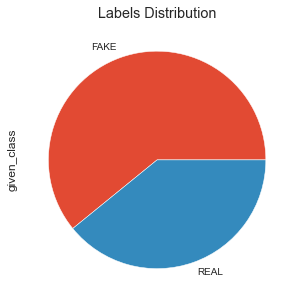

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')

label = data.given_class

pd.Series(label).value_counts().plot(kind='pie', title='Labels Distribution', figsize=(5, 5))

le = LabelEncoder()
le.fit(label)
dummy_y = le.transform(label)

In [28]:
data.head()

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,rating,review_id,author_link,...,Translated_Reviews,trim_data_lemmatized,final_data_lemmatized,reviewLength_after_lemmatize,wordsCount,dc_Avgwords,dc_rating,dc_sentiment,All_dc,given_class
0,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChdDSUhNMG9nS0VJQ0FnSUNXMFB1eGpBRRAB,https://www.google.com/maps/contrib/1008799843...,...,The club is very clean sterilization continuously,The club is very clean sterilization continuously,The club is very clean sterilization continuou...,284,43,0,0,0,0 0 0,FAKE
1,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChZDSUhNMG9nS0VJQ0FnSURLNWZ5YmV3EAE,https://www.google.com/maps/contrib/1040919533...,...,Cleaning interest in precautions and observati...,Cleaning interest in precautions and observati...,Cleaning interest in precautions and observati...,1724,224,0,0,0,0 0 0,FAKE
2,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChZDSUhNMG9nS0VJQ0FnSUNXNS1IeGFBEAE,https://www.google.com/maps/contrib/1074136482...,...,The most beautiful clubs are sunny during the ...,The most beautiful clubs are sunny during the ...,The most beautiful clubs are sunny during the ...,172,16,1,0,0,1 0 0,FAKE
3,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChdDSUhNMG9nS0VJQ0FnSUNzXzRQai1RRRAB,https://www.google.com/maps/contrib/1084219735...,...,The club is clean and the coaches are good and...,The club is clean and the coaches are good and...,The club is clean and the coaches are good and...,966,90,0,1,0,0 1 0,FAKE
4,"gym, Jeddah, Makkah, Saudi Arabia",نادي باقدو,0x15c3d007617bf6cd:0xa1d66f8d697880e6,ChIJzfZ7YQfQwxUR5oB4aY1v1qE,https://www.google.com/maps/place/%D9%86%D8%A7...,https://search.google.com/local/reviews?placei...,"{""1"": 11, ""2"": 3, ""3"": 16, ""4"": 21, ""5"": 84}",4.2,ChZDSUhNMG9nS0VJQ0FnSUNtcHR2dGNREAE,https://www.google.com/maps/contrib/1177852388...,...,The club is beautiful and the coaches of the s...,The club is beautiful and the coaches of the s...,The club is beautiful and the coaches of the s...,107,9,1,0,0,1 0 0,FAKE


# Train - Val - Test Split

Train 80% - Test 20% split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(data.final_data_lemmatized, 
                                                                        dummy_y, 
                                                               stratify=dummy_y,
                                                                  test_size=0.2, 
                                                                 random_state=3)
print("Train data= ",X_train.shape,"+",y_train.shape)  
print("Test data= ",X_test.shape,"+",y_test.shape)

Train data=  (55,) + (55,)
Test data=  (14,) + (14,)


Train 90% - Validation 10% split

In [30]:
# X_train, X_val, y_train, y_val  = train_test_split(X_train, 
#                                                    y_train, 
#                                           stratify=y_train,
#                                              test_size=0.1, 
#                                             random_state=1)
# print("Train data= ",X_train.shape,"+",y_train.shape)  
# print("Val data= ",X_val.shape,"+",y_val.shape)

# Converting reviews to vectors

Converting texts to sequences and then applying padding

In [31]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
vocab_size = 400000
 
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer(num_words=vocab_size)
# word_tokenizer = Tokenizer()
 
word_tokenizer.fit_on_texts(X_train)
# vocab_size = len(word_tokenizer.word_index) + 1
print(vocab_size)
 
trainDatavecs = word_tokenizer.texts_to_sequences(X_train)
trainDataVecs = pad_sequences(trainDatavecs, maxlen=maxReviewLength, padding='post')
 
# valDataVecs = word_tokenizer.texts_to_sequences(X_val)
# valDataVecs = pad_sequences(valDataVecs, maxlen=maxReviewLength, padding='post')
 
testDataVecs = word_tokenizer.texts_to_sequences(X_test)
testDataVecs = pad_sequences(testDataVecs, maxlen=maxReviewLength, padding='post')

400000


# Training and Testing the Data

LSTM Deep Learning Model

In [32]:
from keras.layers.recurrent import LSTM
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dropout,  Bidirectional, Dense, BatchNormalization,  GlobalMaxPool1D, SpatialDropout1D
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.regularizers import l1_l2
import keras
from tensorflow import keras

model = Sequential()

model.add(Embedding(vocab_size, 256, input_length=maxReviewLength))

model.add((SpatialDropout1D(0.3)))

model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())

model.add(Bidirectional(LSTM(32, dropout=0.25, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())

model.add(GlobalMaxPool1D())

model.add(Dense(64, kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 155, 256)          102400000 
                                                                 
 spatial_dropout1d (SpatialD  (None, 155, 256)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 151, 128)          163968    
                                                                 
 dropout (Dropout)           (None, 151, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 50, 128)           0

Training the data

In [33]:
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint 

final_accuracies = []
history_train = []

noOfEpochs = 10
batchSize = 1024 

# filename = 'best.weights.hdf5'
# checkpointer = ModelCheckpoint(filepath=filename, verbose=1, save_best_only=True)
history_train.append(model.fit(trainDataVecs, y_train, epochs=noOfEpochs, batch_size=batchSize))
# model.load_weights(filename)
# predicted = np.rint(model.predict(valDataVecs))
# final_accuracies.append(accuracy_score(y_val, predicted))
# print(accuracy_score(y_val, predicted))

Epoch 1/10
1/1 [==============================] - 20s 20s/step - loss: 1.1823 - accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.9548 - accuracy: 0.5636
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.8760 - accuracy: 0.6364
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.8855 - accuracy: 0.6545
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.0386 - accuracy: 0.4364
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.8622 - accuracy: 0.6727
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.8379 - accuracy: 0.6727
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.7613 - accuracy: 0.7091
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.6853 - accuracy: 0.7818
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 0.7904 - accuracy: 0.6364


Training Results

model statistics by using the lists in which you appended the accuracy and loss of the model.

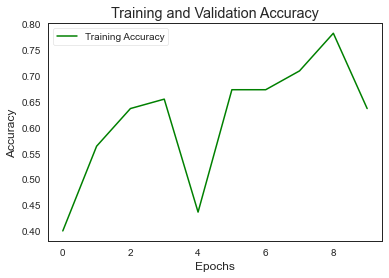

In [34]:
from itertools import chain
import matplotlib.pyplot as plt

acc_train = history_train[0].history['accuracy']
# acc_val = history_train[0].history['val_accuracy']
epochs = range(0,len(acc_train))
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
# plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

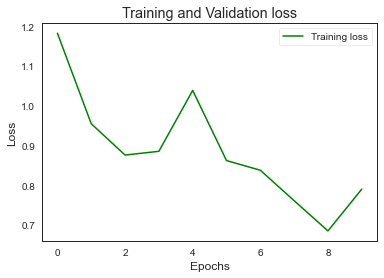

In [35]:
loss_train = history_train[0].history['loss']
# loss_val = history_train[0].history['val_loss']
epochs = range(0,len(loss_train))
plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Final Test Accuracy

In [36]:
# model.load_weights(filename)
predicted = np.rint(model.predict(testDataVecs))
print("Test accuracy = ",accuracy_score(y_test, predicted))

Test accuracy =  0.6428571428571429


In [37]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       0.00      0.00      0.00         5

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



c:\Users\w_ewe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\w_ewe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\w_ewe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
